In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as splinalg

from es_appm_445_2019.utils import get_A,get_rhs,get_init,iter_solve,residual
from es_appm_445_2019.gauss_sidel import gauss_sidel

In [2]:
n    = 32  #problem size
k    =  0 #param
init =  3  #param

In [3]:
A = get_A(n,k)
b = get_rhs(n)
x = get_init(n,init)

print(residual(b,A,x))

y   = splinalg.spsolve(A,b)
xf  = np.abs(np.fft.fftshift(np.fft.fft2(x.reshape(n,n))))
yf  = np.abs(np.fft.fftshift(np.fft.fft2(y.reshape(n,n))))
res = xf - yf
rf  = np.abs(np.fft.fftshift(np.fft.fft2(res.reshape(n,n))))

103.46339652776415


Text(0.5, 1.0, 'exact')

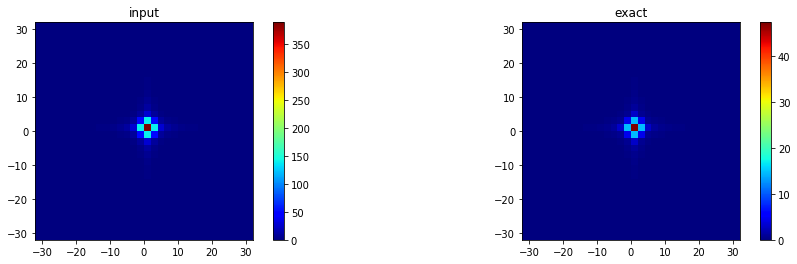

In [4]:
plt.rcParams['figure.figsize'] = (16,4)
f,(ax1,ax2) = plt.subplots(1,2)
im1 = ax1.imshow(xf,extent=[-n,n,-n,n],cmap='jet',origin='lower')
f.colorbar(im1,ax=ax1)
ax1.set_title('input',size=12)
im2 = ax2.imshow(yf,extent=[-n,n,-n,n],cmap='jet',origin='lower')
f.colorbar(im2,ax=ax2)
ax2.set_title('exact',size=12)

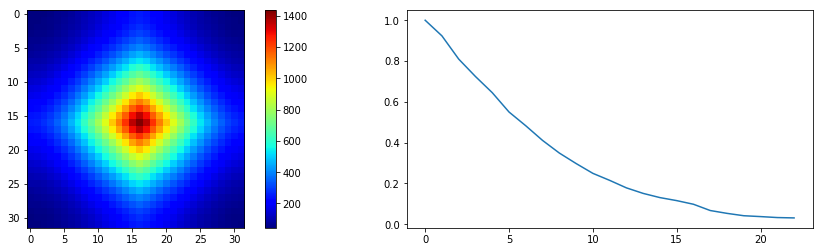

In [5]:
#StackOverflow
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

f,(ax1,ax2) = plt.subplots(1,2)
im1 = ax1.imshow(rf,cmap='jet')
f.colorbar(im1,ax=ax1)
_rf = radial_profile(rf,(n//2,n//2))
ax2.plot(_rf/np.max(_rf))